c:\Users\USER\Desktop
c:\Users\USER
train loss:2.2918682351586783
=== epoch:1, train acc:0.242, test acc:0.229 ===
train loss:2.278420890045613
train loss:2.268272499957663
train loss:2.2424896615051413
train loss:2.187616359148015
train loss:2.1737100877099698
train loss:2.0891502002253945
train loss:2.02662615984145
train loss:1.964604872925731
train loss:1.767824190914378
train loss:1.7657002272614515
train loss:1.6611172847016429
train loss:1.4621143752749697
train loss:1.3707881579607366
train loss:1.2698498780152792
train loss:1.0889443187543357
train loss:0.9906241201396385
train loss:0.8329340122111357
train loss:0.8219530421857891
train loss:0.9005672545038762
train loss:0.5979890789947817
train loss:0.7342898073831974
train loss:0.6920672075259106
train loss:0.7242576313847654
train loss:0.559665725995329
train loss:0.5189404084833698
train loss:0.6088797446912336
train loss:0.5496358575108371
train loss:0.4071146405897471
train loss:0.41613145185302314
train loss:0.411473512

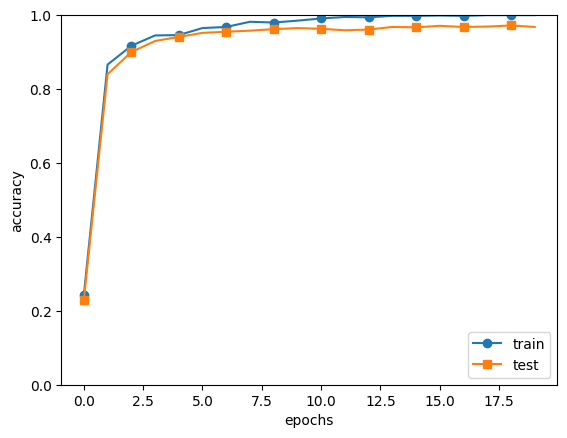

In [5]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim =(1, 28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=500, output_size=10, weight_init_std = 0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                    epochs = max_epochs, mini_batch_size = 100,
                    optimizer = 'Adam', optimizer_param={'lr': 0.001},
                    evaluate_sample_num_per_epoch=1000)
                    

trainer.train()

#매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

#그래프 그리기
markers = {'train' : 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label ='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()

